# Chapter 10 行列積

## 10.1 行列同士の積

行列`A`と`B`の積はJuliaでは`A * B`と書く．本書＊＊＊ページの行列積を計算しよう．


In [1]:
A = [-1.5 3 2; 1 -1 0]

2×3 Array{Float64,2}:
 -1.5   3.0  2.0
  1.0  -1.0  0.0

In [2]:
B = [-1 -1; 0 -2; 1 0]

3×2 Array{Int64,2}:
 -1  -1
  0  -2
  1   0

In [3]:
C = A * B

2×2 Array{Float64,2}:
  3.5  -4.5
 -1.0   1.0

### グラム行列

行列$A$のグラム行列は$G=A^T A$である．これは対称行列であり，$i,j$要素$G_{ij}$は$A$の$i$番目と$j$番目の列の内積である．


In [4]:
A = randn(10, 3);

In [5]:
G = A' * A

3×3 Array{Float64,2}:
 2.81236    0.131176  2.89529
 0.131176  10.6646    5.08826
 2.89529    5.08826   9.759  

In [6]:
# Giiはi番目の列のノルムの2乗
G[2, 2]

10.66460804484717

In [7]:
using LinearAlgebra

In [8]:
norm(A[:, 2])^2

10.664608044847173

In [9]:
# Gijはi番目とj番目の列の内積
G[1, 3]

2.89528835221189

In [10]:
A[:, 1]' * A[:, 3]

2.8952883522118906

### 行列積の計算量

結合法則をチェックしよう．結合法則とは，任意の$m \times n$行列$A$，$n \times p$行列$B$，$p \times q$行列$C$について，$(AB)C=A(BC)$が成り立つことである．以下のコードで分かるように，右辺と左辺では計算量が全く異なる．


In [11]:
m = 2000; 
n = 50; 
q = 2000; 
p = 2000;
A = randn(m, n); 
B = randn(n, p);
C = randn(p, q);

In [12]:
@time LHS = (A * B) * C;

  0.579292 seconds (4.06 k allocations: 61.256 MiB, 23.53% gc time)


In [13]:
@time LHS = (A * B) * C;

  0.355706 seconds (8 allocations: 61.035 MiB, 19.42% gc time)


In [14]:
@time RHS = A * (B * C);

  0.074459 seconds (9 allocations: 31.281 MiB, 14.91% gc time)


In [15]:
@time RHS = A * (B * C);

  0.045626 seconds (8 allocations: 31.281 MiB, 2.94% gc time)


In [16]:
norm(LHS - RHS)

5.285260142477067e-10

In [17]:
@time D_is_ABC = A * B * C;  # これは(A*B)*CとA*(B*C)のどちらだろう？

  0.344881 seconds (3.18 k allocations: 61.206 MiB, 19.44% gc time)


計算量を考えても分かるように，`(A*B)*C`は`A*(B*C)`の10倍の計算時間がかかる．最後の行では，`A*B*C`の評価が左から右へ行われており，つまり`(A*B)*C`と同じであることが分かる．これらの行列については，この計算方法の方が行列積は遅い．

## 10.2 線形関数の合成

### 2次差分行列

本書の＊＊＊ページの2次差分行列を計算する．


In [18]:
using VMLS

In [19]:
D(n) = [-eye(n-1) zeros(n-1)] + [zeros(n-1) eye(n-1)];

In [20]:
D(5)

4×5 Array{Float64,2}:
 -1.0   1.0   0.0   0.0  0.0
  0.0  -1.0   1.0   0.0  0.0
  0.0   0.0  -1.0   1.0  0.0
  0.0   0.0   0.0  -1.0  1.0

In [21]:
D(4)

3×4 Array{Float64,2}:
 -1.0   1.0   0.0  0.0
  0.0  -1.0   1.0  0.0
  0.0   0.0  -1.0  1.0

In [22]:
Delta = D(4) * D(5) # 2次差分行列

3×5 Array{Float64,2}:
 1.0  -2.0   1.0   0.0  0.0
 0.0   1.0  -2.0   1.0  0.0
 0.0   0.0   1.0  -2.0  1.0

## 10.3 冪行列

正方行列$A$の$k$乗を$A^k$と書く．Juliaでは$A^k$で冪乗になる．

本書＊＊＊ページの有向グラフの隣接行列を作ろう．そして，各ノードを始点とする長さ8のcycleがいくつあるのかを求めてみよう（cycleとは，始点と終点が同じノードであるpathである）．


In [23]:
A = [ 0 1 0 0 1; 1 0 1 0 0; 0 0 1 1 1; 1 0 0 0 0; 0 0 0 1 0]

5×5 Array{Int64,2}:
 0  1  0  0  1
 1  0  1  0  0
 0  0  1  1  1
 1  0  0  0  0
 0  0  0  1  0

In [24]:
A^2

5×5 Array{Int64,2}:
 1  0  1  1  0
 0  1  1  1  2
 1  0  1  2  1
 0  1  0  0  1
 1  0  0  0  0

In [25]:
A^8

5×5 Array{Int64,2}:
 18  11  15  20  20
 25  14  21  28  26
 24  14  20  27  26
 11   6   9  12  11
  6   4   5   7   7

In [26]:
number_of_cycles = diag(A^8)

5-element Array{Int64,1}:
 18
 14
 20
 12
  7

### 人口モデル

本書の図10.2を作成するコードを書こう．これは
（2010年時点での各年齢が）2020年の全米の人口（移民を除く）に与える寄与率
である．
Juliaのプロットを図10.1に示す．驚くことではないが，20歳から25歳までの年齢層が最も寄与率が高く，1.5である．これが意味することは，平均的に，2010年時点で20〜25歳の1人は2020年でのおよそ1.5人に寄与する，ということである．

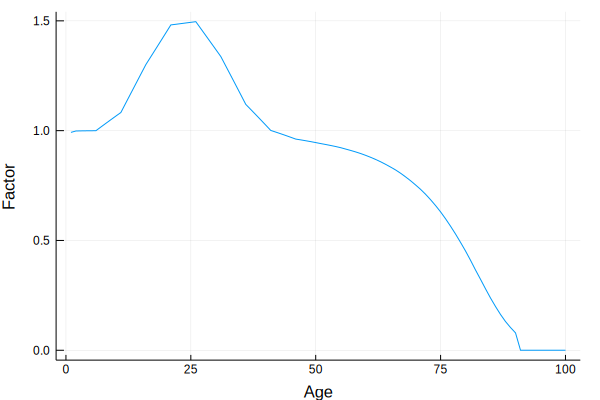

In [27]:
Data = population_data();
b = Data["birth_rate"];
d = Data["death_rate"];
# 人口モデルの状態遷移行列
A = [b'; diagonal(1 .- d[1:end-1]) zeros(length(d)-1)];
# 2020年の各年齢の2020年の人口への寄与率
cf = ones(100)' * (A^10); # 寄与率
using Plots
plot(cf', legend = false, xlabel = "Age", ylabel = "Factor")

![図10.1](fig10-1.pdf)

図10.1 2010年の各年齢が2020年の総人口に与える寄与率．$i-1$歳の値は，行ベクトル$\boldsymbol{1}^T A^{10}$の$i$番目の要素．


## 10.4 QR分解

行列`A`のQR分解はJuliaでは`qr(A)`である．これは$Q$と$R$のタプルを返す．しかし$Q$の型は配列ではなく，特殊な形式であり，コマンド`Matrix(Q)`で通常の行列に戻せる．そのため本書で定義したQR分解は以下の2つのコマンドで実現できる．

```julia
julia> Q, R = qr(A);
julia> Q = Matrix(Q);
```

以下のコードで，本書でのQR分解の定義とのもう一つの（小さな）違いがある．Juliaの関数で計算される$R$では，対角要素が負になることもある．しかし本書の定義では要素は正である．この2つは等価である．もし$R_{ii}$が負であれば，$R$の$i$番目の行と$Q$の$i$番目の列の符号を反転させれば，$R_{ii} > 0$となり，かつ等価な分解が得られる．しかし実際には，QR分解を応用する問題はどれも対角要素の符号に影響されないので，この処理は必要ない．


In [28]:
A = randn(6, 4);
Q, R = qr(A);

In [29]:
R

4×4 Array{Float64,2}:
 -1.65176  -2.62024  -0.298767   1.38167 
  0.0      -1.57414   0.638649   0.574802
  0.0       0.0       2.33424   -0.690938
  0.0       0.0       0.0        1.01706 

In [30]:
Q = Matrix(Q)

6×4 Array{Float64,2}:
 -0.0979025   0.0422086  -0.806819   -0.125745
  0.034544   -0.683817   -0.450625    0.100094
  0.55664     0.453568   -0.236754   -0.336037
 -0.0950973  -0.401887    0.2462     -0.16914 
  0.398959   -0.370816    0.167632   -0.687074
 -0.714956    0.160847   -0.0348248  -0.600474

In [31]:
norm(Q * R - A)

1.1038295064531409e-15

In [32]:
Q' * Q

4×4 Array{Float64,2}:
  1.0           8.49889e-18   1.31272e-16  -5.49846e-17
  8.49889e-18   1.0          -6.10383e-17   5.80574e-17
  1.31272e-16  -6.10383e-17   1.0           1.71515e-16
 -5.49846e-17   5.80574e-17   1.71515e-16   1.0        